In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import datetime
import calendar
from scipy.stats import linregress
import seaborn as sns

# File to Load
file_to_load = "output_data/cleaned_avo.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)
avocado_data=avocado_data.drop(columns='Unnamed: 0',axis=1)

# Preview of the DataFrame
avocado_data.head()

,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


# Gina

Growth: Identify year over year growth

In [2]:
# Group data by year
year_view = avocado_data.groupby(["Year"])
# Calculations for analysis
total_volume = year_view["Total Volume"].sum()/1000000
# YoY Analysis data frame
YOY_df = pd.DataFrame({"Total Volume (in millions)": total_volume})

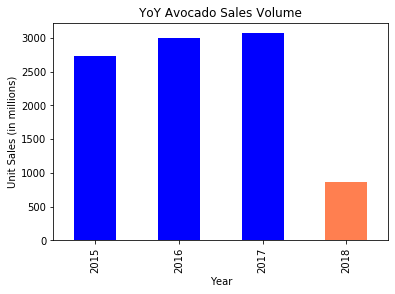

In [4]:
# Generate a bar plot showing YoY trends
YOY_df.plot(kind ="bar", title = "YoY Avocado Sales Volume",color=("blue","blue","blue",'coral'),legend=False)
# Label x-axis
plt.xlabel("Year")
plt.ylabel("Unit Sales (in millions)")
# Show pandas bar plot
plt.savefig('Bar_YoY_sales',bbox_inches='tight')
plt.show()

In [5]:
# Formatting data frame
YOY_df = YOY_df.round(2)
YOY_df["Total Volume (in millions)"] = YOY_df["Total Volume (in millions)"].map("{:,}".format)
# Display dataframe - raw numbers YOY
YOY_df.sort_values(by = ["Year"], ascending=False)

,Total Volume (in millions)
Year,
2018,859.11
2017,"3,069.61"
2016,"3,001.73"
2015,"2,728.21"


Seasonality: Identify month over month trends.

In [6]:
# Isolate needed columns for MoM trending
MoM_avo = avocado_data.loc[:,["Date", "Total Volume", "Total Sales", "Year"]]
# Add month column and extract month using datetime import
MoM_avo["Month"] = pd.DatetimeIndex(MoM_avo['Date']).month
# Group data by month
month_view = MoM_avo.groupby(["Month"])
# Calculations for analysis
total_sales = month_view["Total Sales"].sum()/1000000
total_volume = month_view["Total Volume"].sum()/1000000
# MoM Analysis data frame
MoM_df = pd.DataFrame({
    "Total Volume (in millions)": total_volume,
    })

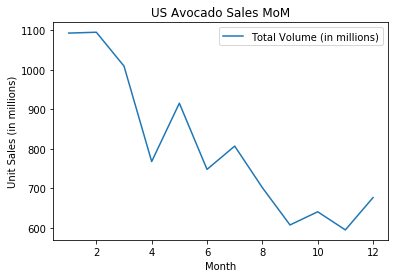

In [7]:
# Create a line chart from grouped MoM_df
MoM_line = MoM_df.plot(kind='line')
# Set the xlabel and ylabel using class methods
MoM_line.set_xlabel("Month")
MoM_line.set_ylabel("Unit Sales (in millions)")
MoM_line.set_title("US Avocado Sales MoM")
# Display MoM line chart
plt.savefig('Line_MoM_sales',bbox_inches='tight')
plt.show()

# Abby

In [3]:
# Grouping by region
data15=avocado_data[avocado_data['Year']==2015].groupby('Region')
data16=avocado_data[avocado_data['Year']==2016].groupby('Region')
data17=avocado_data[avocado_data['Year']==2017].groupby('Region')
data18=avocado_data[avocado_data['Year']==2018].groupby('Region')
# Calculations for totalvol(in millions)
T5=data15['Total Volume'].sum()/1000000
T6=data16['Total Volume'].sum()/1000000
T7=data17['Total Volume'].sum()/1000000
T8=data18['Total Volume'].sum()/1000000
# Region dataframe
totalvol_sum=pd.DataFrame({"2015": T5,"2016":T6,"2017":T7,"2018":T8})
totalvol_sum.head()

,2015,2016,2017,2018
Region,,,,
Albany,4.029896,5.264336,5.231582,1.541986
Atlanta,23.231698,28.326878,28.815120,8.231422
BaltimoreWashington,40.645580,40.893802,41.015634,12.158903
Boise,3.784357,4.653510,4.760561,1.214760
Boston,27.454992,30.571315,30.610672,8.637006


In [8]:
# Remove top 8 regions
Without_8=totalvol_sum.drop(['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West'])
sum_column = Without_8["2015"] + Without_8["2016"]+Without_8["2017"]+Without_8["2018"]
Without_8['Total']=sum_column



,2015,2016,2017,2018,Total
Region,,,,,
Albany,4.029896,5.264336,5.231582,1.541986,16.067800
Atlanta,23.231698,28.326878,28.815120,8.231422,88.605119
BaltimoreWashington,40.645580,40.893802,41.015634,12.158903,134.713919
Boise,3.784357,4.653510,4.760561,1.214760,14.413188
Boston,27.454992,30.571315,30.610672,8.637006,97.273985


In [9]:
Without_8['Total'].sum()

3793.9222295799996

In [6]:
# Top 8 sold the most avo
top8=totalvol_sum.loc[['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West']]
top8.head()



In [10]:
# File to Load
file = "./Resources/p.csv"
# Read Population csv and store into Pandas data frame
popdata = pd.read_csv(file, encoding="ISO-8859-1")
df_pop=popdata.drop([
    'GEO.id', 'GEO.id2','GEO.display-label','GCT_STUB.target-geo-id','GCT_STUB.target-geo-id2','GCT_STUB.display-label'
], axis=1)
df_pop=df_pop.drop(0)
df_pop=df_pop.rename(columns={"GCT_STUB.display-label.1":"City","HD01":"P",})
pop=df_pop['P']
sep=pop.str.split("(",expand=True)
population=sep[0]
df_pop["Population"]=population
df_pop=df_pop.drop(columns="P")
df_pop.head()

,City,Population
1,United States,308745538
2,Alabama,4779736
3,Auburn city,53380
4,Birmingham city,212237
5,Decatur city,55683


In [11]:
# Covert object to float
df_pop['Population']=df_pop['Population'].astype(float)
# get pop from census data
Northeast=['West Virginia','Maryland','Delaware','New Jersey','Connecticut','Rhode Island','Massachusetts','Vermont','New Hampshire','New York','Pennsylvania','Maine']
Northeast=df_pop.loc[df_pop['City'].apply(lambda x: x in Northeast)]
Midsouth=['Kentucky','Virginia','Tennessee','Maryland','North Carolina','South Carolina']
Midsouth=df_pop.loc[df_pop['City'].apply(lambda y: y in Midsouth)]
Southeast=['Mississippi','Alabama','Georgia','Florida']
Southeast=df_pop.loc[df_pop['City'].apply(lambda a: a in Southeast)]
Plains=['North Dakota','South Dakota','Minnesota','Nebraska','Iowa','Kansas','Missouri']
Plains=df_pop.loc[df_pop['City'].apply(lambda b: b in Plains)]
SouthCentral=['Oklahoma','Arkansas','Texas','Louisiana']
SouthCentral=df_pop.loc[df_pop['City'].apply(lambda b: b in SouthCentral)]
Greatlakes=['Wisconsin','Illinois','Indiana','Michigan','Ohio']
Greatlakes=df_pop.loc[df_pop['City'].apply(lambda b: b in Greatlakes)]
West=['Washington','Oregon','Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico']
West=df_pop.loc[df_pop['City'].apply(lambda b: b in West)]
Ca=df_pop.loc[df_pop['City']=='California']

In [12]:
# add up region's population
n=Northeast["Population"].sum()
m=Midsouth["Population"].sum()
s=Southeast["Population"].sum()
sc=SouthCentral["Population"].sum()
p=Plains["Population"].sum()
g=Greatlakes["Population"].sum()
w=West["Population"].sum()
c=Ca["Population"].sum()

In [13]:
# assign the pop back to top dataframe
top8['Population']=(c,g,m,n,p,sc,s,w)
top8['2015 per capita']=(top8['2015']/top8['Population'])*1000000
top8['2016 per capita']=(top8['2016']/top8['Population'])*1000000
top8['2017 per capita']=(top8['2017']/top8['Population'])*1000000
top8['2018 per capita']=(top8['2018']/top8['Population'])*1000000
#drop out the columns that don't use
top8=top8.drop(columns=['2015','2016','2017','2018','Population'])

In [14]:
top8

,2015 per capita,2016 per capita,2017 per capita,2018 per capita
Region,,,,
California,8.090615,8.755805,8.526464,2.247850
GreatLakes,3.648907,3.828825,4.079007,1.145172
Midsouth,3.630727,3.994224,4.286632,1.250965
Northeast,3.185675,3.429279,3.518817,1.038875
Plains,4.273929,4.644702,4.890412,1.366861
SouthCentral,7.991333,8.366726,8.953415,2.512056
Southeast,4.418126,5.467532,5.429332,1.663663
West,9.339680,10.563031,10.577656,2.834889


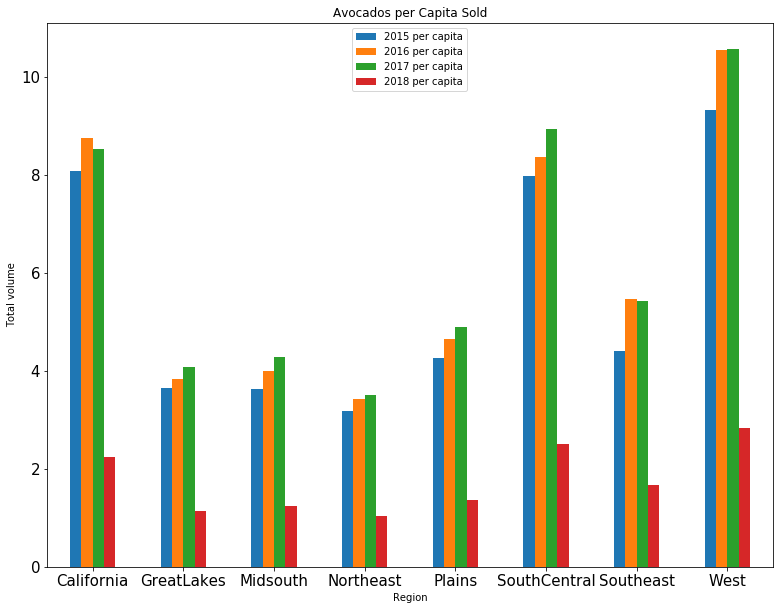

In [15]:
# top 8 
fig, ax = plt.subplots() 
top8.plot(kind='bar',figsize=(13,10),rot=0,fontsize=15,ax=ax).legend(loc='upper center')
ax.set(title='Avocados per Capita Sold',ylabel='Total volume')
plt.savefig('Bar_avo_capita',bbox_inches='tight')

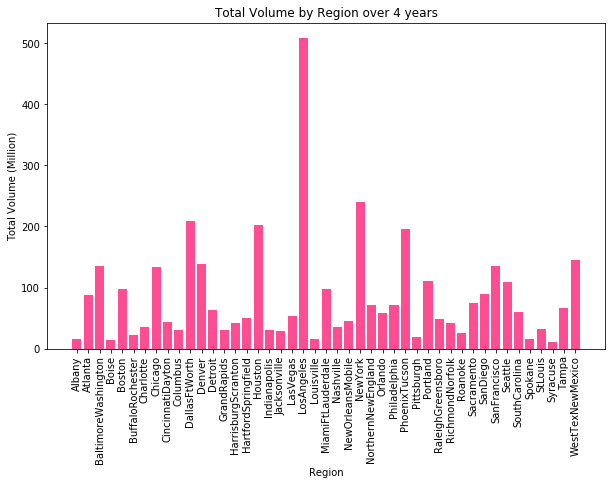

In [16]:
# Region (no top 8) by sales volume - all years
Without_8=totalvol_sum.drop(['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West'])
Without_8['Total']=''
sum_column = Without_8["2015"] + Without_8["2016"]+Without_8["2017"]+Without_8["2018"]
Without_8['Total']=sum_column
# Create a bar chart for Total Vol by Region
x_axis = np.arange(len(Without_8))
plt.figure(figsize=(10,6))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,Without_8['Total'], color="#ff4d94")
plt.title('Total Volume by Region over 4 years')
plt.xlabel('Region')
plt.ylabel('Total Volume (Million)')
plt.xticks(tick_locations, Without_8.index,rotation='vertical')
plt.savefig('Bar_Totalvol_Region',bbox_inches='tight')
plt.show()

# Jacob

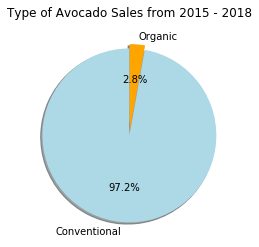

In [17]:
# Count avocados by type (conventional vs organic)
group = avocado_data.groupby("Type")
total = group["Total Volume"].sum()

# Create PieChart
labels = ["Conventional", "Organic"]
counts = [9.385999e+09, 2.726631e+08]
avocado_type_df = pd.DataFrame({"counts": counts,"labels": labels})
fig, ax = plt.subplots()
avocado_type_df.plot.pie(y= "counts", explode = (0.05, 0), labels = labels, colors = ["lightblue", "orange"], 
                         autopct="%1.1f%%", shadow=True, startangle = 90, legend = False, ax=ax)
ax.set_ylabel("")
ax.set_title("Type of Avocado Sales from 2015 - 2018")
plt.savefig('Pie_Type_of_Avocado')

In [18]:
# Group data by year
group_by_year = avocado_data.groupby(["Type","Year"])
total_by_year = group_by_year["Total Volume"].sum()/1000000
# Create DataFrame
type_year_bar = pd.DataFrame({"Year Totals": total_by_year})
type_year_bar.head(10)

Year Totals
Type         Year             
conventional 2015  2672.913320
             2016  2919.990424
             2017  2964.395912
             2018   828.699669
organic      2015    55.300121
             2016    81.740325
             2017   105.216224
             2018    30.406417

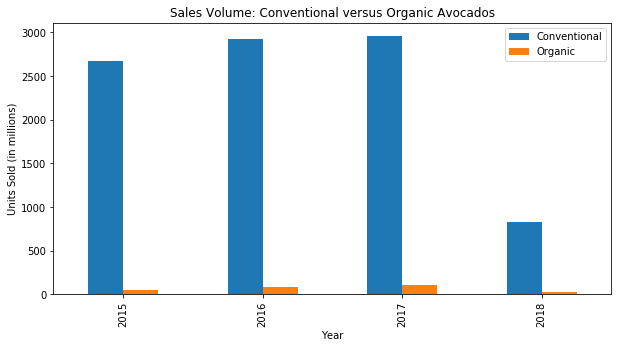

In [19]:
# Create BarChart
conventional = [2672.913320, 2919.990424, 2964.395912, 828.699669]
organic = [55.300121, 81.740325, 105.216224, 30.406417]
index = [2015, 2016, 2017, 2018]
df_multiplot = pd.DataFrame({
    "Conventional": conventional,
    "Organic": organic}, index = index)
multi_plot = df_multiplot.plot(kind = "bar", figsize=(10,5))
plt.title("Sales Volume: Conventional versus Organic Avocados")
plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")
plt.savefig('Bar_Type_of_Avocado.png',bbox_inches='tight')

# Ray

In [20]:
#Group by year
Size_year = avocado_data.groupby(["Year"])
Size_year.count()

,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Region,Total Sales
Year,,,,,,,,,,,,,
2015,5511,5511,5511,5511,5511,5511,5511,5511,5511,5511,5511,5511,5511
2016,5512,5512,5512,5512,5512,5512,5512,5512,5512,5512,5512,5512,5512
2017,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616
2018,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272


In [21]:
#Calculations
small_sales = Size_year["Hass Small"].sum()/1000000
large_sales = Size_year["Hass Large"].sum()/1000000
XLarge_sales = Size_year["Hass XLarge"].sum()/1000000
#Create Dataframe
PLU_df = pd.DataFrame({
    "Hass Small": small_sales,
    "Hass Large": large_sales,
    "Hass XLarge": XLarge_sales})
PLU_df.head()

,Hass Small,Hass Large,Hass XLarge
Year,,,
2015,1057.542135,1099.865552,89.162984
2016,936.176209,1047.090679,99.452825
2017,1015.660963,967.700264,57.611449
2018,282.795201,256.607669,14.399901


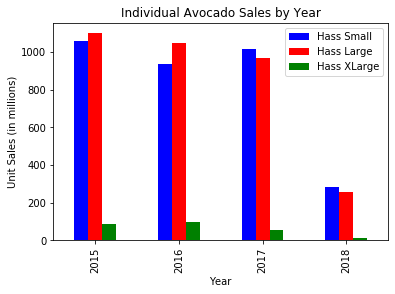

In [22]:
# Generate a bar plot showing YoY trends
PLU_df.plot(kind ="bar", title = "Individual Avocado Sales by Year",color=("blue","red","green"))
# Label x-axis
plt.xlabel("Year")
plt.ylabel("Unit Sales (in millions)")
# Show pandas bar plot
plt.savefig('PLU_Bar_YoY_sales',bbox_inches='tight')
plt.show()

In [23]:
#Calculations
small_bags = Size_year["Small Bags"].sum()/1000000
large_bags = Size_year["Large Bags"].sum()/1000000
XLarge_bags = Size_year["XLarge Bags"].sum()/1000000
#Create Dataframe
PLU_df = pd.DataFrame({
    "Small Bags": small_bags,
    "Large Bags": large_bags,
    "XLarge Bags": XLarge_bags})
PLU_df.head()

,Small Bags,Large Bags,XLarge Bags
Year,,,
2015,396.253547,82.003837,3.385385
2016,695.646041,210.851987,12.513009
2017,764.931453,248.784416,14.908333
2018,224.478543,76.391237,4.427220


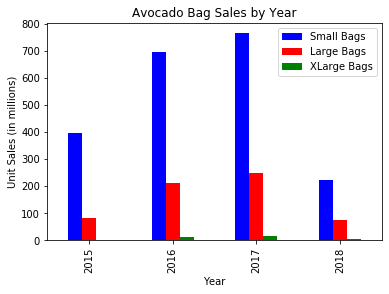

In [24]:
# Generate a bar plot showing YoY trends
PLU_df.plot(kind ="bar", title = "Avocado Bag Sales by Year",color=("blue","red","green"))
# Label x-axis
plt.xlabel("Year")
plt.ylabel("Unit Sales (in millions)")
# Show pandas bar plot
plt.savefig('Bag_Bar_YoY_sales',bbox_inches='tight')
plt.show()